# 182591 박세진 기계학습기초 과제

## 기본 모듈 불러오기 및 설정 확인

In [372]:
# 파이썬 ≥3.5 버전 확인
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 버전 확인
import sklearn
assert sklearn.__version__ >= "0.20"

# 넘파이 임포트  
import numpy as np
import os

# 그래프 출력을 위해 matpolt 임포트
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

##  housing 데이터 다운로드하기

In [373]:
import os
import tarfile
import urllib.request


#housing 데이터 다운로드

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

#hosuing 데이터 불러오는 함수 정의 
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
#정의한 함수로 데이터 불러오기    
fetch_housing_data()

In [374]:
#데이터를 편하게 다루기 위해 판다스 가져오기
import pandas as pd

#판다스로 housing 데이터 읽기
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)
    
#모든 데이터를 담은 판다스 데이터프레임 객체 반환

## housing을 자기 학번으로 변경하기

In [375]:

#판다스로 불러온 데이터 "p182591" 학번에 넣어주기
p182591 = load_housing_data()
p182591.head()

#데이터가 잘들어왔는지 head를 이용해 확인
#각 행이 하나의 구역
#10개의 특성이 있음을 확인
#label은 median_house_value임을 확인


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [376]:
p182591.info()
# info를 이용하여 데이터에 대한 설명, 전체행의 수, 각 특성의 데이터 타입, null 갯수 확인
# 이를 통해 total_bedrooms 에 null값이 있음을 확인
# ocean_proximity만 object 카테고리 데이터임을 확임

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [377]:
# ocean_proximity의 카테고리 종류와 카테고리당 구역의 수 확인
p182591["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [378]:
# descirbe를 이용하여 숫자형 특성의 요약정보 평균,표준편차,최소값,최대값 확인
# 25%,50%,75% : 백위분에 속하는 하위부분의 값. 25%: housing_median_age가 18보다 작다, 50%: 29보다 작다
p182591.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## 데이터 분포 출력해보기

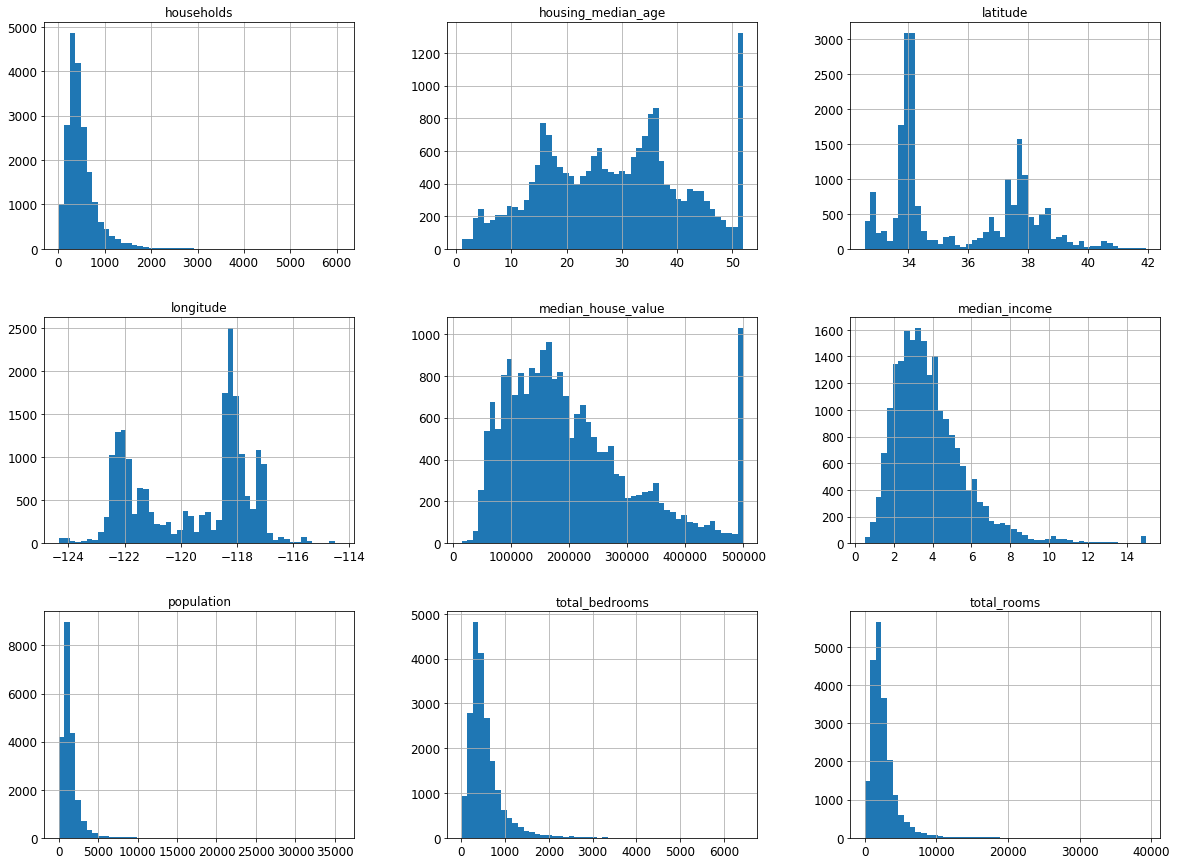

In [379]:
# 숫자형 특성에 대한 히스토그램, 주어진 값의 범위(x)에 속한 샘플수(y)

%matplotlib inline

# matpolt를 이용하여 그래프 그리기
import matplotlib.pyplot as plt
p182591.hist(bins=50, figsize=(20,15))
plt.show()

# 특성 1. median_income : 상한 15, 하한 0.5 (3은 3만 달러)
# 특성 2. 특성인 housing_median age에서 상한값이 있어 최대값이 넙는 값 표현x
# 특성 3 레이블인 median_house_value에서도 상한값 (500000)이 있어서 예측도 이값을 넘지 않게된다.
# 특성 4. 전체적으로 특성들의 스케일이 모두 다르다
# 특성 5 특성들의 히스토그램이 오른쪽으로 꼬리가 길다 패턴찾기가 어려워 분포 조정

# 특성2 해결방안 - 한계값 밖의 정확한 값 알아내거나 훈련세트/테스트세트에서 제거한다.
# 특성4 해결방안 - 스케일링으로 특성들의 스케일을 맞춰준다
# 특성5 해결방안 - 히스토그램의 꼬리가 길면 패턴을 찾기가 어렵기 때문에 분포를 조정해 준다.


## 테스트 세트 만들기

In [380]:
#같은 값을 출력하기 위해 랜덤시드 설정
np.random.seed(42)

In [381]:
# 난수 초기값 지정 
# 20%의 테스트, 80%의 훈련
#사이킷런의 train_test_split을 이용하여 훈련세트와 테스트세트 분리 
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(p182591, test_size=0.2, random_state=42)

In [382]:
#테스트 세트가 잘들어 나눠 졌는지 head로 확인
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


In [383]:
#트레인 세트의 갯수 확인
len(train_set)

16512

In [384]:
#테스트 세트의 갯수 확인
len(test_set)

4128

In [385]:
#income별로 고르게 나누기 위해 median_income을 이용하여 
#income_cat이라는 더미 변수 생성
#소득분위별로 1~5까지 나누기 
p182591["income_cat"]= pd.cut(p182591["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [386]:
# 소득분위 별로 얼마나 나누어 졌는지 확인
p182591["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

In [387]:
# 사이킷런의 StratifiedShuffleSplit를 이용하여 income_cat별로 고르게 분배하여
#strat_train_set과 strat_test_set로 분리

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(p182591, p182591["income_cat"]):
    strat_train_set = p182591.loc[train_index]
    strat_test_set = p182591.loc[test_index]

In [388]:
#strat_train_set 데이터 확인 
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3


In [389]:
#생성했던 income_cat은 분석에 사용하지 않기 때문에 drop으로 없애기
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [390]:
#income_cat 특성이 없어졌는지 확인
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


In [391]:
# 훈련세트 보호를 위해 복사

p182591 = strat_train_set.copy()

## 상관관계 출력하기

In [392]:
#corr를 사용해서 상관계수(피어슨 상관계수)구하기
corr_matrix = p182591.corr()

In [393]:
#레이블인 "median_house_value"를 중심으로 상관관계 확인하기 
#median_income이 상관계수 0.687로 높은 상관관계를 보임을 확인
# 이후 total_room  0.135097  , housing_median_age 0.114110 로 약한 상관관계를 보인다. 
#latitude은 -0.142724 약한 음의 상관관계를 보임을 확인
#나머지 특성은 큰 상관관계를 보이지 않음

corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002F9D42D9EF0>,
      dtype=object)

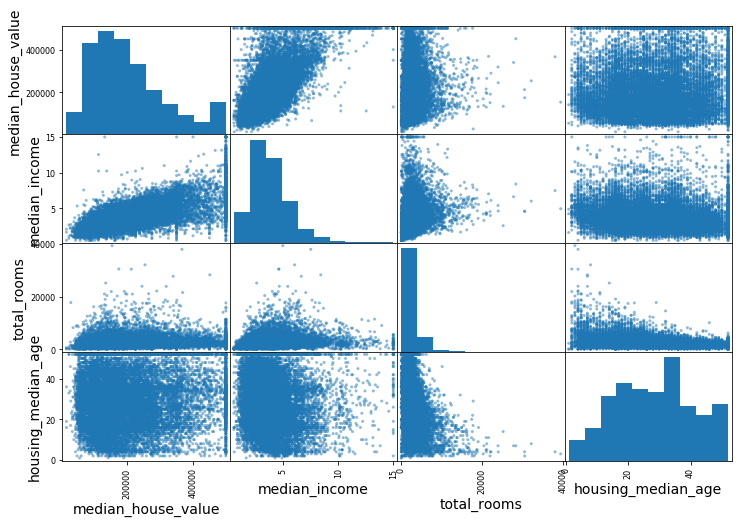

In [394]:
# pscatter_matrix을 이용하여 두 값사이의 관계를 산점도로 파악
# median_house_value와 상관관계가 높았던 3개의 특성 살펴보기

from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(p182591[attributes], figsize=(12, 8))

[0, 16, 0, 550000]

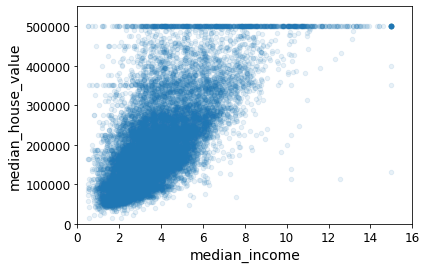

In [395]:
# 상관관계가 가장높은 median_income과 median_house_value 의 산점도 보기
# 상관계수 0.687로 상관관계가 비교적 강하다
# $500,000 $350000 선에서 수평선이 있음 확인
p182591.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])

## 새로운 feature 추가하기( 교재의 3개)

In [396]:
# 가구수 대비 방의 갯수 : rooms_per_household
# 전체방의 수 대비 침실수 :bedrooms_per_room
# 가구수 대비 인구수 : population_per_household

p182591["rooms_per_household"] = p182591["total_rooms"]/p182591["households"]
p182591["bedrooms_per_room"] = p182591["total_bedrooms"]/p182591["total_rooms"]
p182591["population_per_household"]=p182591["population"]/p182591["households"]

In [397]:
# 새로운 특성으로 상관관계 분석
# 새로만든 bedrooms_per_room 특성이 상관계수 -0.259984 으로 조합전 total_rooms,total_bedrooms 보다 상관관계가 높음
# bedrooms_per_room은 음의 상관관계를 보여 bedrooms_per_room이 낮을 수록,median_house_value이 높음을 확인
# rooms_per_household가 상관계수 0.146255로 조합전 total_rooms보다 상관계수가 높음을 확인

corr_matrix = p182591.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

## 새로만든 특성의 상관관계

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002F9D39953C8>,
      dtype=object)

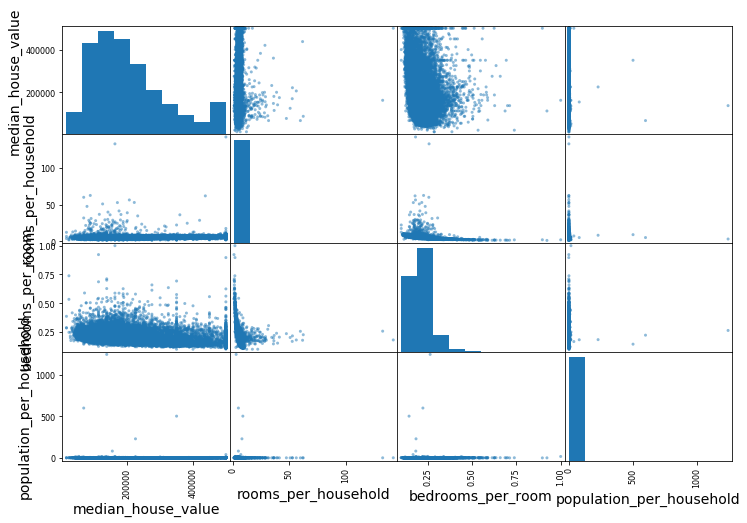

In [398]:
# pscatter_matrix을 이용하여 두 값사이의 관계를 산점도로 파악
# median_house_value와 새로 만들었던 3개의 산점도 살펴보기
attributes = ["median_house_value", "rooms_per_household", "bedrooms_per_room",
              "population_per_household"]
scatter_matrix(p182591[attributes], figsize=(12, 8))

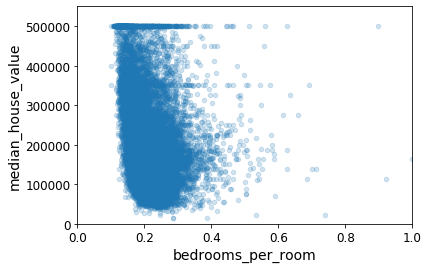

In [399]:
# median_income과 bedrooms_per_room의 산점도 보기
# 상관계수 -0.259984로 약한 음의 상관관계를 보임을 확인
# 

p182591.plot(kind="scatter", x="bedrooms_per_room", y="median_house_value",
             alpha=0.2)
plt.axis([0, 1, 0, 550000])
plt.show()

In [400]:
#새로운 특성을 추가한후 평균,표준편차,최소값,최대값등 살펴보기
p182591.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589,206990.920724,5.440341,0.212878,3.096437
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950,115703.014830,2.611712,0.057379,11.584826
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775,119800.000000,4.442040,0.175304,2.431287
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,179500.000000,5.232284,0.203031,2.817653
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475,263900.000000,6.056361,0.239831,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


## 데이터 정제

In [401]:
# 훈련 세트를 위해 레이블인 "median_house_value" 삭제
# p182591_labels에 "median_house_value" 넣어주기
p182591 = strat_train_set.drop("median_house_value", axis=1) 
p182591_labels = strat_train_set["median_house_value"].copy()

In [402]:
#데이터 확인
p182591.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [403]:
#데이터 확인
p182591.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


## 스케일링 하기

In [404]:
#우선 스케일링을 위해 수치형 데이터만 있는 p182591_num 만들기
p182591_num = p182591.drop("ocean_proximity", axis=1)

In [405]:
#사이킷런에서 제공하는 standardscaler를 이용하여 정규화 하기 
from sklearn.preprocessing import StandardScaler
import pandas as pd


scaler = StandardScaler()
scaler.fit(p182591_num)
p182591_num_scaled = scaler.transform(p182591_num)

p182591_num_scaled = pd.DataFrame(data=p182591_num_scaled, columns=p182591_num.columns.values)

In [406]:
#head를 이용하여 제대로 스케일링 되었는지 확인하기 
p182591_num_scaled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-1.156043,0.771950,0.743331,-0.493234,-0.445796,-0.636211,-0.420698,-0.614937
1,-1.176025,0.659695,-1.165317,-0.908967,-1.034621,-0.998331,-1.022227,1.336459
2,1.186849,-1.342183,0.186642,-0.313660,-0.155018,-0.433639,-0.093318,-0.532046
3,-0.017068,0.313576,-0.290520,-0.362762,-0.397333,0.036041,-0.383436,-1.045566
4,0.492474,-0.659299,-0.926736,1.856193,2.398979,2.724154,2.570975,-0.441437


In [407]:
#사이킷런에서 제공하는 MinMaxScaler를 이용하여 표준화하기 
from sklearn.preprocessing import MinMaxScaler

scaler =MinMaxScaler()
scaler.fit(p182591_num)
p182591_num_scaled = scaler.transform(p182591_num)

p182591_num_scaled = pd.DataFrame(data=p182591_num_scaled, columns=p182591_num.columns.values)

In [408]:
#head를 이용하여 제대로 표준화 되었는지 확인하기 
p182591_num_scaled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,0.245020,0.504782,0.725490,0.039731,0.056218,0.019816,0.062920,0.152019
1,0.241036,0.479277,0.254902,0.017119,0.017075,0.008492,0.020724,0.408374
2,0.712151,0.024442,0.588235,0.049499,0.075548,0.026150,0.085885,0.162908
3,0.472112,0.400638,0.470588,0.046828,0.059439,0.040836,0.065534,0.095447
4,0.573705,0.179596,0.313725,0.167523,0.245329,0.124891,0.272778,0.174811


## 원핫인코딩 적용하기

In [409]:
#범주형 특징인 ocean_proximity를 원핫 인코딩을 위해 p182591_cat에 따로 분리
p182591_cat = p182591[["ocean_proximity"]]
p182591_cat.head()

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN


In [410]:
# 카테고리 목록보기
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [411]:
# OneHotEncoding : 한 특성만 1이고 나머지는 0
# 사이킷런에서 제공하는 OneHotEncoder를 이용하여 원핫인코딩 하기 
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False)
p182591_cat_1hot = cat_encoder.fit_transform(p182591_cat)
p182591_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [412]:
# 카테고리 리스트 보기
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [413]:
from sklearn.base import BaseEstimator, TransformerMixin

# 열 인덱스
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # *args 또는 **kargs 없음
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # 아무것도 하지 않습니다
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(p182591.to_numpy())


## 수치형 데이터 파이프라인 설계

In [414]:
# 파이프라인 : 연속된 단계를 나타냄
# 이름/추정기쌍으로 목록입력

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

#사이킷런의 파이프라인과 StandardScaler,SimpleImputer을 이용하여
#수치형 데이터를 처리하는 파이프라인 설계

imputer = SimpleImputer(strategy="median")

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])
#파이프라인을 적용한 것을 p182591_num_tr에 저장
p182591_num_tr = num_pipeline.fit_transform(p182591_num)

In [415]:
#p182591_num_tr이 잘 적용되었는지 확인
p182591_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

## 전체 데이터 파이프 라인 설계

In [416]:
#하나의 변환기로 각 열마다 다른 변환 적용

from sklearn.compose import ColumnTransformer

# 수치형 열이름 리스트
num_attribs = list(p182591_num)

# 범주형 열이름 리스트
cat_attribs = ["ocean_proximity"]

# ColumnTransformer 객체 리스트
# 이름, 변환기, 변환기 적용될 열 이름(인덱스)

#전체 데이터에 한번에 적용하는 full_pipeline설계
#수치형 데이터는 위에서 정의한 num_pipeline를 불러오기
#카테고리 데이터는 원핫인코더를 이용해 처리하기 

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])


# num_pipeline은 밀집행렬, OneHotEncoder()은 희소행렬
# ColumnTransformer이 밀집도( 0이 아닌 원소의 비율)가 임계값보다 낮으면 희소행렬 반환
# 밀집도가 있어서 밀집행렬 반환


# 파이프라인을 데이터에 적용
p182591_prepared = full_pipeline.fit_transform(p182591)

In [417]:
#파이프라인이 잘적용되었는지 확인
p182591_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [418]:
#준비된 데이터의 프레임 확인
p182591_prepared.shape

(16512, 16)

# 훈련세트 모델 적용

## 선형회귀 모델 적용

In [419]:
# 선형회귀모델에 적용하기 

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(p182591_prepared, p182591_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [420]:
# 선형회귀의 RMSE 평가


from sklearn.metrics import mean_squared_error

p182591_predictions = lin_reg.predict(p182591_prepared)
lin_mse = mean_squared_error(p182591_labels, p182591_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

# 중간 주택 가격이 $120,000에서 $265,000 사이 분포
# 예측 오차 68627 : 좋은결과??? -> 과소적합
# 문제점 : 특성들이 좋은 정보를 제공하기 못했거나 모델이 강력하지 못하다
# 해결 : 좋은 특성 주입(찾거나 생성), 모델의 규제 감소
# 선형모델에서는 규제 감소 여지가 없음
# 특성 추가 ( 인구의 로그스케일)
# 다른 모델 시도


68628.19819848923

In [421]:
# MAE 계산해 보기 

from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(p182591_labels, p182591_predictions)
lin_mae

49439.89599001897

## 결정트리 적용

In [422]:
# 결정트리 적용하기 

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(p182591_prepared, p182591_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [423]:
#결정트리의 rmse 계산하기
p182591_predictions = tree_reg.predict(p182591_prepared)
tree_mse = mean_squared_error(p182591_labels, p182591_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

# 오차가 0
# 훈련데이터에 과적합됐음을 확인
#다른 모델을 사용하거나 교차검증 필요

0.0

## 랜덤포레스트 적용

In [424]:
# 랜덤포레스트모델 적용
# 트리 100개 생성

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(p182591_prepared, p182591_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [425]:
#랜덤포레스트 RMSE 계산

p182591_predictions = forest_reg.predict(p182591_prepared)
forest_mse = mean_squared_error(p182591_labels, p182591_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18603.515021376355

# 교차검증

## 결정트리 교차검증

In [426]:
# 적용했던 모델을 교차검증하기
# cv=10으로 10번의 평가, 매번 다른 1개를 평가, 나머지 9개를 훈련
# 결정트리 교차검증 cv=10 

from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, p182591_prepared, p182591_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

# 교차검증에서 scoring을 효용함수(클수록 좋은값)로 계산해서 neg_mean_squared_error
# np.sqrt(-scores)

In [427]:
def display_scores(scores):
    print("점수:", scores)
    print("평균:", scores.mean())
    print("표준 편차:", scores.std())

display_scores(tree_rmse_scores)

# 교차검증전 오차보다 늘어났음을 확인
# 각 훈련의 평균과 표준편차를 통해 모델의 성능과 추정이 얼마나 정확한지 측정
# 반복된 훈련으로 훈련 비용이 비싸다

점수: [70194.33680785 66855.16363941 72432.58244769 70758.73896782
 71115.88230639 75585.14172901 70262.86139133 70273.6325285
 75366.87952553 71231.65726027]
평균: 71407.68766037929
표준 편차: 2439.4345041191004


## 선형회귀 교차검증

In [428]:
# 선형회귀 교차검증 cv=10

lin_scores = cross_val_score(lin_reg, p182591_prepared, p182591_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

#대체로 비슷한 점수를 보임을 확인

점수: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
평균: 69052.46136345083
표준 편차: 2731.674001798349


## 랜덤포레스트 교차검증

In [429]:
# 랜덤포레스트 교차검증 cv =10 

from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, p182591_prepared, p182591_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

#다른 모델보다 점수가 낮음을 확인

점수: [49519.80364233 47461.9115823  50029.02762854 52325.28068953
 49308.39426421 53446.37892622 48634.8036574  47585.73832311
 53490.10699751 50021.5852922 ]
평균: 50182.303100336096
표준 편차: 2097.0810550985693


In [430]:
# 선형회귀 결과 describe()로 살펴보기

scores = cross_val_score(lin_reg, p182591_prepared,p182591_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     69052.461363
std       2879.437224
min      64969.630564
25%      67136.363758
50%      68156.372635
75%      70982.369487
max      74739.570526
dtype: float64

In [431]:
#랜덤포레스트 결과 describe()로 살펴보기

scores = cross_val_score(forest_reg, p182591_prepared, p182591_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     50182.303100
std       2210.517524
min      47461.911582
25%      48803.201309
50%      49770.694467
75%      51751.217424
max      53490.106998
dtype: float64

In [432]:
# 각 모델별 RMSE 출력

print("선형회귀:", lin_rmse_scores.mean())
print("결정트리:", tree_rmse_scores.mean())
print("랜덤포레스트:", forest_rmse_scores.mean())

선형회귀: 69052.46136345083
결정트리: 71407.68766037929
랜덤포레스트: 50182.303100336096


## 그리드 서치 적용하기

In [433]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # 12(=3×4)개의 하이퍼파라미터 조합을 시도
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # bootstrap은 False로 하고 6(=2×3)개의 조합을 시도
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

# n_estimators : 결정트리 갯수
# max_features : feature 수

#  {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]} : 딕셔너리
# 3 일때 2,4,6,8 조합 실행

# 총 12+6 = 18번의 조합 탐색. 


# 랜덤포레스트로 그리드탐색

forest_reg = RandomForestRegressor(random_state=42)

# cv=5로 다섯 개의 폴드로 훈련하여 총 18x5=90번의 훈련.

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(p182591_prepared, p182591_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],
  

In [434]:
#최상의 조합보기
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [435]:
#최적의 추정기 확인하기
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [436]:
# 파라미터 살펴보기
grid_search.cv_results_["params"]

[{'max_features': 2, 'n_estimators': 3},
 {'max_features': 2, 'n_estimators': 10},
 {'max_features': 2, 'n_estimators': 30},
 {'max_features': 4, 'n_estimators': 3},
 {'max_features': 4, 'n_estimators': 10},
 {'max_features': 4, 'n_estimators': 30},
 {'max_features': 6, 'n_estimators': 3},
 {'max_features': 6, 'n_estimators': 10},
 {'max_features': 6, 'n_estimators': 30},
 {'max_features': 8, 'n_estimators': 3},
 {'max_features': 8, 'n_estimators': 10},
 {'max_features': 8, 'n_estimators': 30},
 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3},
 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10},
 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3},
 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10},
 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3},
 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}]

In [437]:
# 스코어살펴보기
score=grid_search.cv_results_["mean_test_score"]
print(np.sqrt(-score))

[63669.05791727 55627.16171305 53384.57867637 60965.9918593
 52740.98248529 50377.34440959 58663.84733372 52006.15355974
 50146.46596416 57869.25504028 51711.09443661 49682.25345942
 62895.08888991 54658.1448439  59470.39959473 52725.01091081
 57490.61295607 51009.51445842]


In [438]:
#파라미터별 RMSE확인 

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

#  max_features가 8, n_estimators 가 30 일때 RMSE가 49682로 가장 낮다. 
# 이전의 교차검증 보다 좋은 결과 탐색

63669.05791727153 {'max_features': 2, 'n_estimators': 3}
55627.16171305252 {'max_features': 2, 'n_estimators': 10}
53384.57867637289 {'max_features': 2, 'n_estimators': 30}
60965.99185930139 {'max_features': 4, 'n_estimators': 3}
52740.98248528835 {'max_features': 4, 'n_estimators': 10}
50377.344409590376 {'max_features': 4, 'n_estimators': 30}
58663.84733372485 {'max_features': 6, 'n_estimators': 3}
52006.15355973719 {'max_features': 6, 'n_estimators': 10}
50146.465964159885 {'max_features': 6, 'n_estimators': 30}
57869.25504027614 {'max_features': 8, 'n_estimators': 3}
51711.09443660957 {'max_features': 8, 'n_estimators': 10}
49682.25345942335 {'max_features': 8, 'n_estimators': 30}
62895.088889905004 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54658.14484390074 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59470.399594730654 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52725.01091081235 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [439]:
#데이터프레임으로 테이블뷰로 보기

pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.111528,0.016180,0.005775,0.001154,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.837622e+09,-4.147108e+09,...,-4.053749e+09,1.519609e+08,18,-1.064113e+09,-1.105142e+09,-1.116550e+09,-1.112342e+09,-1.129650e+09,-1.105559e+09,2.220402e+07
1,0.349272,0.027757,0.015780,0.004720,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.047771e+09,-3.254861e+09,...,-3.094381e+09,1.327046e+08,11,-5.927175e+08,-5.870952e+08,-5.776964e+08,-5.716332e+08,-5.802501e+08,-5.818785e+08,7.345821e+06
2,1.035448,0.120586,0.040075,0.005592,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.689185e+09,-3.021086e+09,...,-2.849913e+09,1.626879e+08,9,-4.381089e+08,-4.391272e+08,-4.371702e+08,-4.376955e+08,-4.452654e+08,-4.394734e+08,2.966320e+06
3,0.164208,0.027272,0.005333,0.001310,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.730181e+09,-3.786886e+09,...,-3.716852e+09,1.631421e+08,16,-9.865163e+08,-1.012565e+09,-9.169425e+08,-1.037400e+09,-9.707739e+08,-9.848396e+08,4.084607e+07
4,0.562393,0.058881,0.016179,0.003933,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.666283e+09,-2.784511e+09,...,-2.781611e+09,1.268562e+08,8,-5.097115e+08,-5.162820e+08,-4.962893e+08,-5.436192e+08,-5.160297e+08,-5.163863e+08,1.542862e+07
5,1.705204,0.131183,0.037301,0.005921,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.387153e+09,-2.588448e+09,...,-2.537877e+09,1.214603e+08,3,-3.838835e+08,-3.880268e+08,-3.790867e+08,-4.040957e+08,-3.845520e+08,-3.879289e+08,8.571233e+06
6,0.232171,0.054518,0.005391,0.001953,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.119657e+09,-3.586319e+09,...,-3.441447e+09,1.893141e+08,14,-9.245343e+08,-8.886939e+08,-9.353135e+08,-9.009801e+08,-8.624664e+08,-9.023976e+08,2.591445e+07
7,0.875042,0.228086,0.018324,0.010400,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.549663e+09,-2.782039e+09,...,-2.704640e+09,1.471542e+08,6,-4.980344e+08,-5.045869e+08,-4.994664e+08,-4.990325e+08,-5.055542e+08,-5.013349e+08,3.100456e+06
8,2.456416,0.138441,0.036103,0.001471,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.370010e+09,-2.583638e+09,...,-2.514668e+09,1.285063e+08,2,-3.838538e+08,-3.804711e+08,-3.805218e+08,-3.856095e+08,-3.901917e+08,-3.841296e+08,3.617057e+06
9,0.331910,0.048931,0.005003,0.001116,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.353504e+09,-3.348552e+09,...,-3.348851e+09,1.241864e+08,13,-9.228123e+08,-8.553031e+08,-8.603321e+08,-8.881964e+08,-9.151287e+08,-8.883545e+08,2.750227e+07


## 랜덤 서치 적용하기

In [440]:
# 랜덤하게 탐색공간을 탐색
# 탐색공간이 클 경우 그리드서치보다 추천
# 설정값이 연속형일 경우 추천
# 사이파이의 randint를 이용하여 범위내의 정수값을 균등분포로 추출 

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

# 탐색 반복수 n_iter=10 로 10번 반복

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(p182591_prepared, p182591_labels)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [441]:
#랜덤서치 점수확인하기 
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49150.657232934034 {'max_features': 7, 'n_estimators': 180}
51389.85295710133 {'max_features': 5, 'n_estimators': 15}
50796.12045980556 {'max_features': 3, 'n_estimators': 72}
50835.09932039744 {'max_features': 5, 'n_estimators': 21}
49280.90117886215 {'max_features': 7, 'n_estimators': 122}
50774.86679035961 {'max_features': 3, 'n_estimators': 75}
50682.75001237282 {'max_features': 3, 'n_estimators': 88}
49608.94061293652 {'max_features': 5, 'n_estimators': 100}
50473.57642831875 {'max_features': 3, 'n_estimators': 150}
64429.763804893395 {'max_features': 5, 'n_estimators': 2}


## 최상의 모델과 오차 분석

In [442]:
# 그리드 서치로 찾은 특성 중요도 보기

feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.33442355e-02, 6.29090705e-02, 4.11437985e-02, 1.46726854e-02,
       1.41064835e-02, 1.48742809e-02, 1.42575993e-02, 3.66158981e-01,
       5.64191792e-02, 1.08792957e-01, 5.33510773e-02, 1.03114883e-02,
       1.64780994e-01, 6.02803867e-05, 1.96041560e-03, 2.85647464e-03])

In [443]:
# 새로 추가한 특성

extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # 예전 방식

# named_transformers : 파이프라인에서 특정 특징 참조
# cat : 범주형 특성을 원핫인코더로 변경하는 클래스 

cat_encoder = full_pipeline.named_transformers_["cat"]

# 원핫인코딩의 카테고리의 특성 추출
# ocien_proximity

cat_one_hot_attribs = list(cat_encoder.categories_[0])

attributes = num_attribs + extra_attribs + cat_one_hot_attribs

# sort 하여 특징의 중요도 보여주기

sorted(zip(feature_importances, attributes), reverse=True)

# median_income, inland, pop_per_hhold 등이 좋은 특징
# 범주형 값이 좋은 결과를 보여주지 못해 삭제 가능

[(0.36615898061813423, 'median_income'),
 (0.16478099356159054, 'INLAND'),
 (0.10879295677551575, 'pop_per_hhold'),
 (0.07334423551601243, 'longitude'),
 (0.06290907048262032, 'latitude'),
 (0.056419179181954014, 'rooms_per_hhold'),
 (0.053351077347675815, 'bedrooms_per_room'),
 (0.04114379847872964, 'housing_median_age'),
 (0.014874280890402769, 'population'),
 (0.014672685420543239, 'total_rooms'),
 (0.014257599323407808, 'households'),
 (0.014106483453584104, 'total_bedrooms'),
 (0.010311488326303788, '<1H OCEAN'),
 (0.0028564746373201584, 'NEAR OCEAN'),
 (0.0019604155994780706, 'NEAR BAY'),
 (6.0280386727366e-05, 'ISLAND')]

## 결과 출력하기

In [444]:
#그리드서치로 찾은 최상의 모델 적용하기 
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

# 테스트세트에 만들어놓은 파이프라인 적용하기 
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

#rmse확인하기 
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

# 테스트 데이터에 적용한 값이 더 낮은 경우가 일반적

In [445]:
#그리드 서치로 찾은 최종모델의 rmse확인
final_rmse

47730.22690385927

In [446]:
#랜덤서치로 찾은 최상의 모델 적용하기 
final_model = rnd_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

# 테스트세트에 만들어놓은 파이프라인 적용하기 
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

#rmse확인하기 
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

# 테스트 데이터에 적용한 값이 더 낮은 경우가 일반적

In [447]:
#그리드 서치로 찾은 최종모델의 rmse확인
final_rmse
#그리드 서치로 찾은 모델이 rmse가 더 낮음을 확인

46910.92117024934

In [448]:
#테스트 RMSE에 대한 95% 신뢰 구간을 계산하기
from scipy import stats

#95% 신뢰구간
confidence = 0.95

# 모든 샘플에 대한 제곱오차
squared_errors = (final_predictions - y_test) ** 2

# final_predictions 넘파이배열, y_test : 시리즈(판다스데이터프레임) -> 결과는 시리즈
# squared_errors 샘플갯수

np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(), #평균값
                         scale=stats.sem(squared_errors))) # 표준오차 계산

# 신뢰구간 보기 

array([44945.41068188, 48797.32686039])